# Getting started

See https://github.com/NREL/floris/blob/main/examples/_getting_started/example_00_open_and_vis_floris.py

Written by Paul Fleming

Nicholas Hamilton
nicholas.hamilton@nrel.gov

2021-02-03

In [1]:
import matplotlib.pyplot as plt
import floris.tools as ft
import numpy as np

## initialize Floris
Same setup as in the `example_input.json`, but with 5 turbines aligned axially.

In [2]:
# Initialize the FLORIS interface fi
# For basic usage, the florice interface provides a simplified interface to
# the underlying classes
fi = ft.floris_interface.FlorisInterface("example_input.json")

floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.


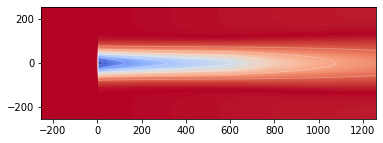

In [3]:
# Calculate wake
fi.calculate_wake()

# Get horizontal plane at default height (hub-height)
hor_plane = fi.get_hor_plane()

# Plot and show
fig, ax = plt.subplots()
ft.visualization.visualize_cut_plane(hor_plane, ax=ax)

## Visualize turbine layout

floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.


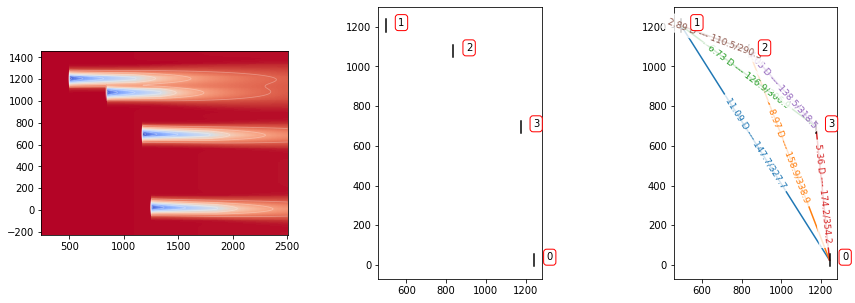

In [4]:
# Make a random 9-turbine layout
layout_x = np.random.uniform(low=0, high=126 * 10, size=4)
layout_y = np.random.uniform(low=0, high=126 * 10, size=4)
fi.reinitialize_flow_field(layout_array=(layout_x, layout_y))
fi.calculate_wake()

# Show layout visualizations
fig, axarr = plt.subplots(1, 3, figsize=(15, 5))

ax = axarr[0]
hor_plane = fi.get_hor_plane()
ft.visualization.visualize_cut_plane(hor_plane, ax=ax)

ax = axarr[1]
fi.vis_layout(ax=ax)

ax = axarr[2]
fi.vis_layout(ax=ax, show_wake_lines=True)

## Visualize wakes, inflow, and deficit

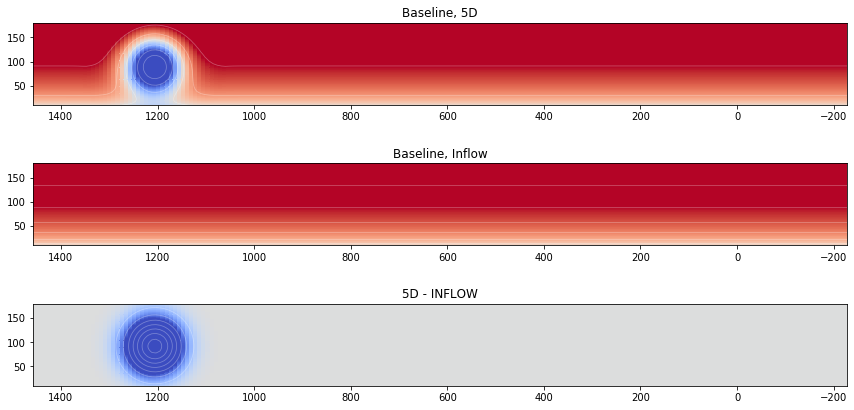

In [5]:
# Grab some cross planes
D = 126
cut_plane_base_5 = fi.get_cross_plane(5 * D)
cut_plane_base_in = fi.get_cross_plane(-5 * D)


# Get the difference planes
cut_plane_diff = ft.cut_plane.subtract(cut_plane_base_5, cut_plane_base_in)


# Plot and show
fig, axarr = plt.subplots(3, 1, figsize=(12, 6))

ax = axarr[0]
ft.visualization.visualize_cut_plane(cut_plane_base_5, ax=ax, minSpeed=4, maxSpeed=8)
ax.set_title("Baseline, 5D")

ax = axarr[1]
ft.visualization.visualize_cut_plane(cut_plane_base_in, ax=ax, minSpeed=4, maxSpeed=8)
ax.set_title("Baseline, Inflow")

ax = axarr[2]
ft.visualization.visualize_cut_plane(cut_plane_diff, ax=ax, minSpeed=-2, maxSpeed=2)
ax.set_title("5D - INFLOW")

# Reverse axis  making the view upstream looking down
for ax in axarr.flatten():
    ft.visualization.reverse_cut_plane_x_axis_in_plot(ax)

fig.tight_layout()